In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
import scipy.interpolate as inter
import scipy.special as spc
import glob
import uproot
from scipy.optimize import curve_fit

test=np.logspace(np.log10(0.005),np.log10(6.0),1000)
for i in range(len(test)):
    print(i,test[i])

0 0.004999999999999999
1 0.005035612093178725
2 0.00507147783059356
3 0.005107599018804947
4 0.0051439774772403975
5 0.005180615038286147
6 0.0052175135473794525
7 0.005254674863101561
8 0.0052921008572712975
9 0.005329793415039363
10 0.005367754434983311
11 0.0054059858292031405
12 0.0054444895234176255
13 0.005483267457061334
14 0.005522321583382283
15 0.005561653869540342
16 0.005601266296706315
17 0.005641160860161747
18 0.005681339569399399
19 0.00572180444822448
20 0.005762557534856603
21 0.005803600882032419
22 0.0058449365571090275
23 0.005886566642168129
24 0.005928493234120863
25 0.005970718444813454
26 0.006013244401133575
27 0.006056073245117499
28 0.006099207134057961
29 0.006142648240612839
30 0.006186398752914607
31 0.0062304608746805165
32 0.006274836825323616
33 0.00631952884006456
34 0.006364539170044164
35 0.006409870082436817
36 0.006455523860564663
37 0.0065015028040126465
38 0.006547809228744296
39 0.006594445467218401
40 0.006641413868506522
41 0.0066887167984112

In [18]:
file = uproot.open(f'./fit/new/NPE_SET3_nPR.root')

energyc2=file['npr_graph_2'].member('fX')
ratioc2=file['npr_graph_2'].member('fY')
entoratio_c2func=inter.interp1d(energyc2,ratioc2)
energyc3=file['npr_graph_3'].member('fX')
ratioc3=file['npr_graph_3'].member('fY')
entoratio_c3func=inter.interp1d(energyc3,ratioc3)
energyc4=file['npr_graph_4'].member('fX')
ratioc4=file['npr_graph_4'].member('fY')
entoratio_c4func=inter.interp1d(energyc4,ratioc4)
energyc6=file['npr_graph_6'].member('fX')
ratioc6=file['npr_graph_6'].member('fY')
entoratio_c6func=inter.interp1d(energyc6,ratioc6)
energyc7=file['npr_graph_7'].member('fX')
ratioc7=file['npr_graph_7'].member('fY')
entoratio_c7func=inter.interp1d(energyc7,ratioc7)

qc550keVc2=747.3*620.697571
qc550keVc3=747.8*639.862549
qc550keVc4=750*587.43811
qc550keVc6=745.3*565.981445
qc550keVc7=748.2*590.684814

ev=0.7
print(entoratio_c2func(ev)*qc550keVc2/50*ev,entoratio_c3func(ev)*qc550keVc3/50*ev,entoratio_c4func(ev)*qc550keVc4/50*ev,entoratio_c6func(ev)*qc550keVc6/50*ev,entoratio_c7func(ev)*qc550keVc7/50*ev)

5187.824552201332 5351.584715216082 4927.579427648009 4717.843896877922 4942.922049235168


1000000


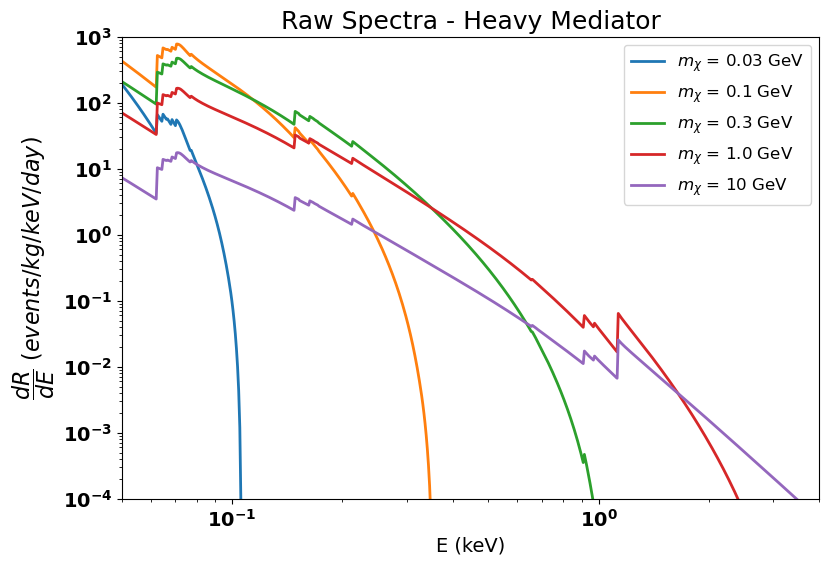

In [4]:
mdm=[30000,35000,40000,50000,60000,70000,80000,90000,100000,120000,140000,160000,180000,200000,250000,300000,400000,600000,800000,1000000,2000000,5000000,10000000]
    
energy=np.zeros(1000)
spectramin_I_v=np.zeros((len(mdm),len(energy)))
spectramax_I_v=np.zeros((len(mdm),len(energy)))
spectramin_Na_v=np.zeros((len(mdm),len(energy)))
spectramax_Na_v=np.zeros((len(mdm),len(energy)))
for m in range(len(mdm)):
    arq = open('./spectra_t338.03/authors/vector/I_m%s_heavy.txt' % "{:.1f}".format(mdm[m]), 'r')
    texto1 = arq.readlines()
    arq.close()

    for i in range(len(texto1)):
        texto1[i] = texto1[i].split(" ")
        texto1[i] = [float(x) for x in texto1[i]]

    N1=len(texto1)
    for i in range(N1):
        energy[i]=texto1[i][0]
        spectramin_I_v[m][i]=texto1[i][1]
        
    arq = open('./spectra_t153.34/authors/vector/I_m%s_heavy.txt' % "{:.1f}".format(mdm[m]), 'r')
    texto1 = arq.readlines()
    arq.close()

    for i in range(len(texto1)):
        texto1[i] = texto1[i].split(" ")
        texto1[i] = [float(x) for x in texto1[i]]

    N1=len(texto1)
    for i in range(N1):
        spectramax_I_v[m][i]=texto1[i][1]
        
    arq = open('./spectra_t338.03/authors/vector/Na_m%s_heavy.txt' % "{:.1f}".format(mdm[m]), 'r')
    texto1 = arq.readlines()
    arq.close()

    for i in range(len(texto1)):
        texto1[i] = texto1[i].split(" ")
        texto1[i] = [float(x) for x in texto1[i]]

    N1=len(texto1)
    for i in range(N1):
        energy[i]=texto1[i][0]
        spectramin_Na_v[m][i]=texto1[i][1]
        
    arq = open('./spectra_t153.34/authors/vector/Na_m%s_heavy.txt' % "{:.1f}".format(mdm[m]), 'r')
    texto1 = arq.readlines()
    arq.close()

    for i in range(len(texto1)):
        texto1[i] = texto1[i].split(" ")
        texto1[i] = [float(x) for x in texto1[i]]

    N1=len(texto1)
    for i in range(N1):
        spectramax_Na_v[m][i]=texto1[i][1]
        
        
nt=10**3*6.02*10**23/149.89 #Number of I and Na atoms per NaI kg
rho_DM = 0.4 #GeV/cm^3

rateamp_Na_v=np.zeros((len(mdm),len(energy)))
rateamp_I_v=np.zeros((len(mdm),len(energy)))
ratemed_Na_v=np.zeros((len(mdm),len(energy)))
ratemed_I_v=np.zeros((len(mdm),len(energy)))
for m in range(len(mdm)):
    for i in range(len(energy)):
        rateamp_Na_v[m][i]=nt*rho_DM/(mdm[m]/10**6)*(spectramax_Na_v[m][i]-spectramin_Na_v[m][i])/2
        rateamp_I_v[m][i]=nt*rho_DM/(mdm[m]/10**6)*(spectramax_I_v[m][i]-spectramin_I_v[m][i])/2
        ratemed_Na_v[m][i]=nt*rho_DM/(mdm[m]/10**6)*(spectramax_Na_v[m][i]+spectramin_Na_v[m][i])/2
        ratemed_I_v[m][i]=nt*rho_DM/(mdm[m]/10**6)*(spectramax_I_v[m][i]+spectramin_I_v[m][i])/2
        
mv=19
print(mdm[mv])
plt.figure(figsize=(9,6))
plt.plot(energy,ratemed_Na_v[0]+ratemed_I_v[0],linewidth=2.0,label='$m_\chi$ = 0.03 GeV',linestyle='solid')
plt.plot(energy,ratemed_Na_v[8]+ratemed_I_v[8],linewidth=2.0,label='$m_\chi$ = 0.1 GeV',linestyle='solid')
plt.plot(energy,ratemed_Na_v[15]+ratemed_I_v[15],linewidth=2.0,label='$m_\chi$ = 0.3 GeV',linestyle='solid')
plt.plot(energy,ratemed_Na_v[mv]+ratemed_I_v[mv],linewidth=2.0,label='$m_\chi$ = 1.0 GeV',linestyle='solid')
plt.plot(energy,ratemed_Na_v[22]+ratemed_I_v[22],linewidth=2.0,label='$m_\chi$ = 10 GeV',linestyle='solid')
plt.title('Raw Spectra - Heavy Mediator',fontsize=18)
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.05,4)
plt.ylim(1E-4,1000)
plt.xticks(fontsize=14,fontweight='bold')
plt.yticks(fontsize=14,fontweight='bold')
plt.xlabel('E (keV)',fontsize=14)
plt.ylabel('$\dfrac{dR}{dE}~(events/kg/keV/day)$',fontsize=16,fontweight='bold')
plt.legend(fontsize=12)

1000000


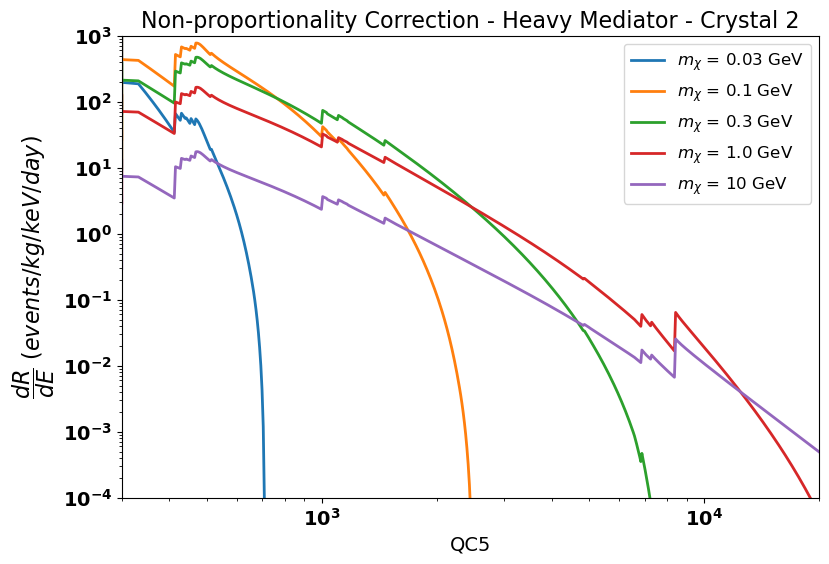

In [54]:
qc5c2plot=np.zeros(len(energy))
qc5c3plot=np.zeros(len(energy))
qc5c4plot=np.zeros(len(energy))
qc5c6plot=np.zeros(len(energy))
qc5c7plot=np.zeros(len(energy))

for i in range(len(energy)):
    if (energy[i]>0.05):
        qc5c2plot[i]=entoratio_c2func(energy[i])*qc550keVc2/50*energy[i]
        qc5c3plot[i]=entoratio_c3func(energy[i])*qc550keVc3/50*energy[i]
        qc5c4plot[i]=entoratio_c4func(energy[i])*qc550keVc4/50*energy[i]
        qc5c6plot[i]=entoratio_c6func(energy[i])*qc550keVc6/50*energy[i]
        qc5c7plot[i]=entoratio_c7func(energy[i])*qc550keVc7/50*energy[i]
    else:
        qc5c2plot[i]=300.0
        qc5c3plot[i]=300.0
        qc5c4plot[i]=300.0
        qc5c6plot[i]=300.0
        qc5c7plot[i]=300.0

mv=19
print(mdm[mv])
plt.figure(figsize=(9,6))
plt.plot(qc5c2plot,ratemed_Na_v[0]+ratemed_I_v[0],linewidth=2.0,label='$m_\chi$ = 0.03 GeV',linestyle='solid')
plt.plot(qc5c2plot,ratemed_Na_v[8]+ratemed_I_v[8],linewidth=2.0,label='$m_\chi$ = 0.1 GeV',linestyle='solid')
plt.plot(qc5c2plot,ratemed_Na_v[15]+ratemed_I_v[15],linewidth=2.0,label='$m_\chi$ = 0.3 GeV',linestyle='solid')
#plt.plot(qc5c2plot,ratemed_Na_v[mv]+ratemed_I_v[mv],linewidth=2.0,label='$m_\chi$ = 1.0 GeV',linestyle='solid')
#plt.plot(qc5c3plot,ratemed_Na_v[mv]+ratemed_I_v[mv],linewidth=2.0,label='Crystal 3',linestyle='solid')
#plt.plot(qc5c4plot,ratemed_Na_v[mv]+ratemed_I_v[mv],linewidth=2.0,label='Crystal 4',linestyle='solid')
#plt.plot(qc5c6plot,ratemed_Na_v[mv]+ratemed_I_v[mv],linewidth=2.0,label='Crystal 6',linestyle='solid')
#plt.plot(qc5c7plot,ratemed_Na_v[mv]+ratemed_I_v[mv],linewidth=2.0,label='Crystal 7',linestyle='solid')
plt.plot(qc5c2plot,ratemed_Na_v[mv]+ratemed_I_v[mv],linewidth=2.0,label='$m_\chi$ = 1.0 GeV',linestyle='solid')
plt.plot(qc5c2plot,ratemed_Na_v[22]+ratemed_I_v[22],linewidth=2.0,label='$m_\chi$ = 10 GeV',linestyle='solid')
plt.title('Non-proportionality Correction - Heavy Mediator - Crystal 2',fontsize=16)
plt.xscale('log')
plt.yscale('log')
plt.xlim(300,20000)
plt.ylim(1E-4,1000)
plt.xticks(fontsize=14,fontweight='bold')
plt.yticks(fontsize=14,fontweight='bold')
plt.xlabel('QC5',fontsize=14)
plt.ylabel('$\dfrac{dR}{dE}~(events/kg/keV/day)$',fontsize=16,fontweight='bold')
plt.legend(fontsize=12)

In [ ]:
arq = open('effC2_SET3.txt', 'r') #abre o arquivo
texto = arq.readlines() #salva cada linha do arquivo como uma string
arq.close()

for i in range(len(texto)): #separa as colunas e elimina a ultima coluna que contem '\n'
    texto[i] = texto[i].split(" ")
    texto[i] = [float(x) for x in texto[i]] #transforma em numero os valores 

N=len(texto)
effC2=[]

for i in range(N):
    effC2.append(texto[i][1])

arq = open('effC3_SET3.txt', 'r') #abre o arquivo
texto = arq.readlines() #salva cada linha do arquivo como uma string
arq.close()

for i in range(len(texto)): #separa as colunas e elimina a ultima coluna que contem '\n'
    texto[i] = texto[i].split(" ")
    texto[i] = [float(x) for x in texto[i]] #transforma em numero os valores 

N=len(texto)
effC3=[]

for i in range(N):
    effC3.append(texto[i][1])

arq = open('effC4_SET3.txt', 'r') #abre o arquivo
texto = arq.readlines() #salva cada linha do arquivo como uma string
arq.close()

for i in range(len(texto)): #separa as colunas e elimina a ultima coluna que contem '\n'
    texto[i] = texto[i].split(" ")
    texto[i] = [float(x) for x in texto[i]] #transforma em numero os valores 

N=len(texto)
effC4=[]

for i in range(N):
    effC4.append(texto[i][1])

arq = open('effC6_SET3.txt', 'r') #abre o arquivo
texto = arq.readlines() #salva cada linha do arquivo como uma string
arq.close()

for i in range(len(texto)): #separa as colunas e elimina a ultima coluna que contem '\n'
    texto[i] = texto[i].split(" ")
    texto[i] = [float(x) for x in texto[i]] #transforma em numero os valores 

N=len(texto)
effC6=[]

for i in range(N):
    effC6.append(texto[i][1])

arq = open('effC7_SET3.txt', 'r') #abre o arquivo
texto = arq.readlines() #salva cada linha do arquivo como uma string
arq.close()

for i in range(len(texto)): #separa as colunas e elimina a ultima coluna que contem '\n'
    texto[i] = texto[i].split(" ")
    texto[i] = [float(x) for x in texto[i]] #transforma em numero os valores 

N=len(texto)
effC7=[]

for i in range(N):
    effC7.append(texto[i][1])

eff=np.zeros((5,34))
for i in range(34):
    eff[0][i]=effC2[i]
    eff[1][i]=effC3[i]
    eff[2][i]=effC4[i]
    eff[3][i]=effC6[i]
    eff[4][i]=effC7[i]
print(eff[0])
    
mdm=[30000,35000,40000,50000,60000,70000,80000,100000,120000,140000,160000,180000,200000,250000,300000,400000,600000,800000,1000000,2000000,5000000,10000000]
print(mdm)
cmass=[9.15,9.16,18.0,12.5,12.5]


file = uproot.open(f'./NPE_SET3_nPR.root')

xnpec2=file['inv_conv_2'].member('fX')
energyc2=file['inv_conv_2'].member('fY')
npetoen_c2func=inter.interp1d(xnpec2,energyc2)
entonpe_c2func=inter.interp1d(energyc2,xnpec2)
xnpec3=file['inv_conv_3'].member('fX')
energyc3=file['inv_conv_3'].member('fY')
npetoen_c3func=inter.interp1d(xnpec3,energyc3)
entonpe_c3func=inter.interp1d(energyc3,xnpec3)
xnpec4=file['inv_conv_4'].member('fX')
energyc4=file['inv_conv_4'].member('fY')
npetoen_c4func=inter.interp1d(xnpec4,energyc4)
entonpe_c4func=inter.interp1d(energyc4,xnpec4)
xnpec6=file['inv_conv_6'].member('fX')
energyc6=file['inv_conv_6'].member('fY')
npetoen_c6func=inter.interp1d(xnpec6,energyc6)
entonpe_c6func=inter.interp1d(energyc6,xnpec6)
xnpec7=file['inv_conv_7'].member('fX')
energyc7=file['inv_conv_7'].member('fY')
npetoen_c7func=inter.interp1d(xnpec7,energyc7)
entonpe_c7func=inter.interp1d(energyc7,xnpec7)

energyc2=file['npr_graph_2'].member('fX')
ratioc2=file['npr_graph_2'].member('fY')
entoratio_c2func=inter.interp1d(energyc2,ratioc2)
energyc3=file['npr_graph_3'].member('fX')
ratioc3=file['npr_graph_3'].member('fY')
entoratio_c3func=inter.interp1d(energyc3,ratioc3)
energyc4=file['npr_graph_4'].member('fX')
ratioc4=file['npr_graph_4'].member('fY')
entoratio_c4func=inter.interp1d(energyc4,ratioc4)
energyc6=file['npr_graph_6'].member('fX')
ratioc6=file['npr_graph_6'].member('fY')
entoratio_c6func=inter.interp1d(energyc6,ratioc6)
energyc7=file['npr_graph_7'].member('fX')
ratioc7=file['npr_graph_7'].member('fY')
entoratio_c7func=inter.interp1d(energyc7,ratioc7)

qc550keVc2=747.3*620.697571
qc550keVc3=747.8*639.862549
qc550keVc4=750*587.43811
qc550keVc6=745.3*565.981445
qc550keVc7=748.2*590.684814

file = uproot.open(f'./CalibrationCurve_graph_truncate.root')

enqc5c2=file['qc5_graph_2'].member('fX')
qc5c2=file['qc5_graph_2'].member('fY')
qc5toen_c2func=inter.interp1d(qc5c2,enqc5c2)
enqc5c3=file['qc5_graph_3'].member('fX')
qc5c3=file['qc5_graph_3'].member('fY')
qc5toen_c3func=inter.interp1d(qc5c3,enqc5c3)
enqc5c4=file['qc5_graph_4'].member('fX')
qc5c4=file['qc5_graph_4'].member('fY')
qc5toen_c4func=inter.interp1d(qc5c4,enqc5c4)
enqc5c6=file['qc5_graph_6'].member('fX')
qc5c6=file['qc5_graph_6'].member('fY')
qc5toen_c6func=inter.interp1d(qc5c6,enqc5c6)
enqc5c7=file['qc5_graph_7'].member('fX')
qc5c7=file['qc5_graph_7'].member('fY')
qc5toen_c7func=inter.interp1d(qc5c7,enqc5c7)

qapp=np.zeros(7000)
xpec2=np.zeros(7000)
xpec3=np.zeros(7000)
xpec4=np.zeros(7000)
xpec6=np.zeros(7000)
xpec7=np.zeros(7000)
rateres_cosine100_v=np.zeros((len(mdm),5,len(qapp)))
ratebin=np.zeros((len(mdm),5,61))
for m in range(len(mdm)):
    arq=open('./correctedspectra/set3res/scaledpoisson/COSINE100_med_m%s_heavy_vector_1xpecut.txt' % ("{:.1f}".format(mdm[m])),'r')
    texto1 = arq.readlines() #salva cada linha do arquivo como uma string
    arq.close()
    for i in range(len(texto1)): #separa as colunas e elimina a ultima coluna que contem '\n'
        texto1[i] = texto1[i].split("\t")
        texto1[i] = [float(x) for x in texto1[i]] #transforma em numero os valores
    N1=len(texto1)
    for i in range(N1):
        qapp[i]=texto1[i][0]
        if (qapp[i]>350.0):
            xpec2[i]=entonpe_c2func(qc5toen_c2func(qapp[i]))
            xpec3[i]=entonpe_c3func(qc5toen_c3func(qapp[i]))
            xpec4[i]=entonpe_c4func(qc5toen_c4func(qapp[i]))
            xpec6[i]=entonpe_c6func(qc5toen_c6func(qapp[i]))
            xpec7[i]=entonpe_c7func(qc5toen_c7func(qapp[i]))
        for k in range(1,6):
            rateres_cosine100_v[m][k-1][i]=texto1[i][k]
    
    binxpe_cosine100=np.zeros(61)
    for k in range(5):
        if (k==0):
            ratefunc_v=inter.interp1d(xpec2,rateres_cosine100_v[m][k])
        if (k==1):
            ratefunc_v=inter.interp1d(xpec3,rateres_cosine100_v[m][k])
        if (k==2):
            ratefunc_v=inter.interp1d(xpec4,rateres_cosine100_v[m][k])
        if (k==3):
            ratefunc_v=inter.interp1d(xpec6,rateres_cosine100_v[m][k])
        if (k==4):
            ratefunc_v=inter.interp1d(xpec7,rateres_cosine100_v[m][k])
        def integrand_v(x):
            return (ratefunc_v(x))
        lowen=8.0
        highen=10.0
        for i in range(61):
            binxpe_cosine100[i]=(highen+lowen)/2
            I_v = quad(integrand_v, lowen, highen)
            if (i<34):
                ratebin[m][k][i]=I_v[0]*eff[k][i]/2.0 #events/day/xpe/kg
            else:
                ratebin[m][k][i]=I_v[0]*1.0/2.0 #events/day/xpe/kg
            lowen=lowen+2.0
            highen=lowen+2.0
    print(mdm[m],binxpe_cosine100)
    
    f1=open('./correctedspectra/set3res/scaledpoisson/energy/COSINE100_med_m%s_heavy_vector_8xpe_1xpecut.txt' % (mdm[m]),'w')
    for i in range(len(binxpe_cosine100)):
        if (binxpe_cosine100[i]>=8.0):
            print("{:.5e}".format(binxpe_cosine100[i]),file=f1,end="\t")
            print("{:.5e}".format(ratebin[m][0][i]),file=f1,end="\t")
            print("{:.5e}".format(ratebin[m][1][i]),file=f1,end="\t")
            print("{:.5e}".format(ratebin[m][2][i]),file=f1,end="\t")
            print("{:.5e}".format(ratebin[m][3][i]),file=f1,end="\t")
            print("{:.5e}".format(ratebin[m][4][i]),file=f1,end="\n")
    f1.close()

[0.21871741 0.41469009 0.57216281 0.7028252  0.79397294 0.86023131
 0.90764215 0.93615248 0.95035818 0.96427161 0.97435969 0.98091646
 0.98543579 0.98846089 0.99081007 0.99291221 0.99440659 0.99468852
 0.99549575 0.99593381 0.99655957 0.9962879  0.99682693 0.99692675
 0.99761357 0.99712538 1.         1.         1.         1.
 1.         1.         1.         1.        ]
[30000, 35000, 40000, 50000, 60000, 70000, 80000, 100000, 120000, 140000, 160000, 180000, 200000, 250000, 300000, 400000, 600000, 800000, 1000000, 2000000, 5000000, 10000000]
30000 [  9.  11.  13.  15.  17.  19.  21.  23.  25.  27.  29.  31.  33.  35.
  37.  39.  41.  43.  45.  47.  49.  51.  53.  55.  57.  59.  61.  63.
  65.  67.  69.  71.  73.  75.  77.  79.  81.  83.  85.  87.  89.  91.
  93.  95.  97.  99. 101. 103. 105. 107. 109. 111. 113. 115. 117. 119.
 121. 123. 125. 127. 129.]
35000 [  9.  11.  13.  15.  17.  19.  21.  23.  25.  27.  29.  31.  33.  35.
  37.  39.  41.  43.  45.  47.  49.  51.  53.  55.  57.  5

C:\Users\Luis Eduardo\AppData\Local\Temp\ipykernel_131960\1283745220.py:193: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_v = quad(integrand_v, lowen, highen)


50000 [  9.  11.  13.  15.  17.  19.  21.  23.  25.  27.  29.  31.  33.  35.
  37.  39.  41.  43.  45.  47.  49.  51.  53.  55.  57.  59.  61.  63.
  65.  67.  69.  71.  73.  75.  77.  79.  81.  83.  85.  87.  89.  91.
  93.  95.  97.  99. 101. 103. 105. 107. 109. 111. 113. 115. 117. 119.
 121. 123. 125. 127. 129.]
60000 [  9.  11.  13.  15.  17.  19.  21.  23.  25.  27.  29.  31.  33.  35.
  37.  39.  41.  43.  45.  47.  49.  51.  53.  55.  57.  59.  61.  63.
  65.  67.  69.  71.  73.  75.  77.  79.  81.  83.  85.  87.  89.  91.
  93.  95.  97.  99. 101. 103. 105. 107. 109. 111. 113. 115. 117. 119.
 121. 123. 125. 127. 129.]


C:\Users\Luis Eduardo\AppData\Local\Temp\ipykernel_131960\1283745220.py:193: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  I_v = quad(integrand_v, lowen, highen)


70000 [  9.  11.  13.  15.  17.  19.  21.  23.  25.  27.  29.  31.  33.  35.
  37.  39.  41.  43.  45.  47.  49.  51.  53.  55.  57.  59.  61.  63.
  65.  67.  69.  71.  73.  75.  77.  79.  81.  83.  85.  87.  89.  91.
  93.  95.  97.  99. 101. 103. 105. 107. 109. 111. 113. 115. 117. 119.
 121. 123. 125. 127. 129.]
80000 [  9.  11.  13.  15.  17.  19.  21.  23.  25.  27.  29.  31.  33.  35.
  37.  39.  41.  43.  45.  47.  49.  51.  53.  55.  57.  59.  61.  63.
  65.  67.  69.  71.  73.  75.  77.  79.  81.  83.  85.  87.  89.  91.
  93.  95.  97.  99. 101. 103. 105. 107. 109. 111. 113. 115. 117. 119.
 121. 123. 125. 127. 129.]
100000 [  9.  11.  13.  15.  17.  19.  21.  23.  25.  27.  29.  31.  33.  35.
  37.  39.  41.  43.  45.  47.  49.  51.  53.  55.  57.  59.  61.  63.
  65.  67.  69.  71.  73.  75.  77.  79.  81.  83.  85.  87.  89.  91.
  93.  95.  97.  99. 101. 103. 105. 107. 109. 111. 113. 115. 117. 119.
 121. 123. 125. 127. 129.]
120000 [  9.  11.  13.  15.  17.  19.  21.  23. 

In [ ]:
print(mdm[20])
plt.plot(xpec2,rateres_cosine100_v[20][0])
plt.plot(binxpe_cosine100,ratebin[20][0])
plt.xlim(5,50)
plt.ylim(0,0.5)

In [63]:
qapp=np.zeros(3000)
xpec2=np.zeros(3000)
xpec3=np.zeros(3000)
xpec4=np.zeros(3000)
xpec6=np.zeros(3000)
xpec7=np.zeros(3000)
rateres_cosine100_1xpecut_poi=np.zeros((len(mdm),5,len(qapp)))
rateres_cosine100_2xpecut_poi=np.zeros((len(mdm),5,len(qapp)))
rateres_cosine100_3xpecut_poi=np.zeros((len(mdm),5,len(qapp)))
rateres_cosine100_4xpecut_poi=np.zeros((len(mdm),5,len(qapp)))
rateres_cosine100_5xpecut_poi=np.zeros((len(mdm),5,len(qapp)))
rateres_cosine100_1xpecut_gauss=np.zeros((len(mdm),5,len(qapp)))
rateres_cosine100_2xpecut_gauss=np.zeros((len(mdm),5,len(qapp)))
rateres_cosine100_3xpecut_gauss=np.zeros((len(mdm),5,len(qapp)))
rateres_cosine100_4xpecut_gauss=np.zeros((len(mdm),5,len(qapp)))
rateres_cosine100_5xpecut_gauss=np.zeros((len(mdm),5,len(qapp)))
ratebin=np.zeros((len(mdm),5,34))
for m in range(len(mdm)):
    arq=open('./correctedspectra/set3res/scaledpoisson/COSINE100_med_m%s_heavy_vector_1xpecut.txt' % ("{:.1f}".format(mdm[m])),'r')
    texto1 = arq.readlines() #salva cada linha do arquivo como uma string
    arq.close()
    for i in range(len(texto1)): #separa as colunas e elimina a ultima coluna que contem '\n'
        texto1[i] = texto1[i].split("\t")
        texto1[i] = [float(x) for x in texto1[i]] #transforma em numero os valores
    N1=len(texto1)
    for i in range(N1):
        qapp[i]=texto1[i][0]
        if (qapp[i]>350.0):
            xpec2[i]=entonpe_c2func(qc5toen_c2func(qapp[i]))
            xpec3[i]=entonpe_c3func(qc5toen_c3func(qapp[i]))
            xpec4[i]=entonpe_c4func(qc5toen_c4func(qapp[i]))
            xpec6[i]=entonpe_c6func(qc5toen_c6func(qapp[i]))
            xpec7[i]=entonpe_c7func(qc5toen_c7func(qapp[i]))
        for k in range(1,6):
            rateres_cosine100_1xpecut_poi[m][k-1][i]=texto1[i][k]
    arq=open('./correctedspectra/set3res/scaledpoisson/COSINE100_med_m%s_heavy_vector_2xpecut.txt' % ("{:.1f}".format(mdm[m])),'r')
    texto1 = arq.readlines() #salva cada linha do arquivo como uma string
    arq.close()
    for i in range(len(texto1)): #separa as colunas e elimina a ultima coluna que contem '\n'
        texto1[i] = texto1[i].split("\t")
        texto1[i] = [float(x) for x in texto1[i]] #transforma em numero os valores
    N1=len(texto1)
    for i in range(N1):
        for k in range(1,6):
            rateres_cosine100_2xpecut_poi[m][k-1][i]=texto1[i][k]
    arq=open('./correctedspectra/set3res/scaledpoisson/COSINE100_med_m%s_heavy_vector_3xpecut.txt' % ("{:.1f}".format(mdm[m])),'r')
    texto1 = arq.readlines() #salva cada linha do arquivo como uma string
    arq.close()
    for i in range(len(texto1)): #separa as colunas e elimina a ultima coluna que contem '\n'
        texto1[i] = texto1[i].split("\t")
        texto1[i] = [float(x) for x in texto1[i]] #transforma em numero os valores
    N1=len(texto1)
    for i in range(N1):
        for k in range(1,6):
            rateres_cosine100_3xpecut_poi[m][k-1][i]=texto1[i][k]
    arq=open('./correctedspectra/set3res/scaledpoisson/COSINE100_med_m%s_heavy_vector_4xpecut.txt' % ("{:.1f}".format(mdm[m])),'r')
    texto1 = arq.readlines() #salva cada linha do arquivo como uma string
    arq.close()
    for i in range(len(texto1)): #separa as colunas e elimina a ultima coluna que contem '\n'
        texto1[i] = texto1[i].split("\t")
        texto1[i] = [float(x) for x in texto1[i]] #transforma em numero os valores
    N1=len(texto1)
    for i in range(N1):
        for k in range(1,6):
            rateres_cosine100_4xpecut_poi[m][k-1][i]=texto1[i][k]
    arq=open('./correctedspectra/set3res/scaledpoisson/COSINE100_med_m%s_heavy_vector_5xpecut.txt' % ("{:.1f}".format(mdm[m])),'r')
    texto1 = arq.readlines() #salva cada linha do arquivo como uma string
    arq.close()
    for i in range(len(texto1)): #separa as colunas e elimina a ultima coluna que contem '\n'
        texto1[i] = texto1[i].split("\t")
        texto1[i] = [float(x) for x in texto1[i]] #transforma em numero os valores
    N1=len(texto1)
    for i in range(N1):
        for k in range(1,6):
            rateres_cosine100_5xpecut_poi[m][k-1][i]=texto1[i][k]
            
    arq=open('./correctedspectra/set3res/gauss/COSINE100_med_m%s_heavy_vector_1xpecut.txt' % ("{:.1f}".format(mdm[m])),'r')
    texto1 = arq.readlines() #salva cada linha do arquivo como uma string
    arq.close()
    for i in range(len(texto1)): #separa as colunas e elimina a ultima coluna que contem '\n'
        texto1[i] = texto1[i].split("\t")
        texto1[i] = [float(x) for x in texto1[i]] #transforma em numero os valores
    N1=len(texto1)
    for i in range(N1):
        for k in range(1,6):
            rateres_cosine100_1xpecut_gauss[m][k-1][i]=texto1[i][k]
    arq=open('./correctedspectra/set3res/gauss/COSINE100_med_m%s_heavy_vector_2xpecut.txt' % ("{:.1f}".format(mdm[m])),'r')
    texto1 = arq.readlines() #salva cada linha do arquivo como uma string
    arq.close()
    for i in range(len(texto1)): #separa as colunas e elimina a ultima coluna que contem '\n'
        texto1[i] = texto1[i].split("\t")
        texto1[i] = [float(x) for x in texto1[i]] #transforma em numero os valores
    N1=len(texto1)
    for i in range(N1):
        for k in range(1,6):
            rateres_cosine100_2xpecut_gauss[m][k-1][i]=texto1[i][k]
    arq=open('./correctedspectra/set3res/gauss/COSINE100_med_m%s_heavy_vector_3xpecut.txt' % ("{:.1f}".format(mdm[m])),'r')
    texto1 = arq.readlines() #salva cada linha do arquivo como uma string
    arq.close()
    for i in range(len(texto1)): #separa as colunas e elimina a ultima coluna que contem '\n'
        texto1[i] = texto1[i].split("\t")
        texto1[i] = [float(x) for x in texto1[i]] #transforma em numero os valores
    N1=len(texto1)
    for i in range(N1):
        for k in range(1,6):
            rateres_cosine100_3xpecut_gauss[m][k-1][i]=texto1[i][k]
    arq=open('./correctedspectra/set3res/gauss/COSINE100_med_m%s_heavy_vector_4xpecut.txt' % ("{:.1f}".format(mdm[m])),'r')
    texto1 = arq.readlines() #salva cada linha do arquivo como uma string
    arq.close()
    for i in range(len(texto1)): #separa as colunas e elimina a ultima coluna que contem '\n'
        texto1[i] = texto1[i].split("\t")
        texto1[i] = [float(x) for x in texto1[i]] #transforma em numero os valores
    N1=len(texto1)
    for i in range(N1):
        for k in range(1,6):
            rateres_cosine100_4xpecut_gauss[m][k-1][i]=texto1[i][k]
    arq=open('./correctedspectra/set3res/gauss/COSINE100_med_m%s_heavy_vector_5xpecut.txt' % ("{:.1f}".format(mdm[m])),'r')
    texto1 = arq.readlines() #salva cada linha do arquivo como uma string
    arq.close()
    for i in range(len(texto1)): #separa as colunas e elimina a ultima coluna que contem '\n'
        texto1[i] = texto1[i].split("\t")
        texto1[i] = [float(x) for x in texto1[i]] #transforma em numero os valores
    N1=len(texto1)
    for i in range(N1):
        for k in range(1,6):
            rateres_cosine100_5xpecut_gauss[m][k-1][i]=texto1[i][k]

1000000 100000 10000000


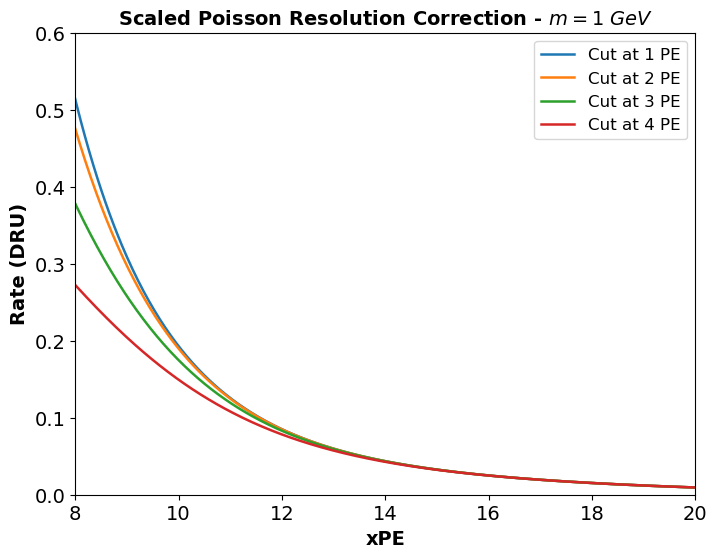

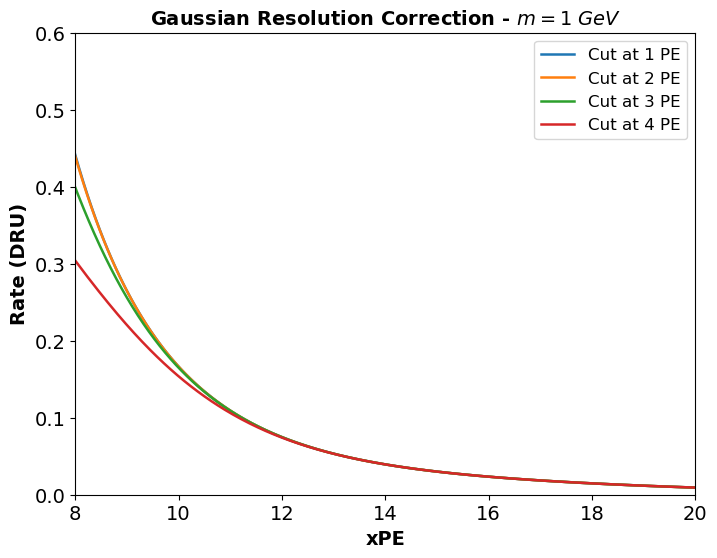

In [91]:
print(mdm[18],mdm[7],mdm[21])
mv=18
plt.figure(figsize=(8,6))
plt.plot(xpec2,rateres_cosine100_1xpecut_poi[mv][0],label='Cut at 1 PE',linewidth=1.8)
plt.plot(xpec2,rateres_cosine100_2xpecut_poi[mv][0],label='Cut at 2 PE',linewidth=1.8)
plt.plot(xpec2,rateres_cosine100_3xpecut_poi[mv][0],label='Cut at 3 PE',linewidth=1.8)
plt.plot(xpec2,rateres_cosine100_4xpecut_poi[mv][0],label='Cut at 4 PE',linewidth=1.8)
#plt.plot(xpec2,rateres_cosine100_5xpecut_poi[mv][0])
plt.xlim(8,20)
plt.ylim(0,0.6)
plt.title('Scaled Poisson Resolution Correction - $m=1~GeV$',fontsize=14,fontweight='bold')
plt.xlabel('xPE',fontsize=14,fontweight='bold')
plt.ylabel('Rate (DRU)',fontsize=14,fontweight='bold')
plt.legend(fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

plt.figure(figsize=(8,6))
plt.plot(xpec2,rateres_cosine100_1xpecut_gauss[mv][0],label='Cut at 1 PE',linewidth=1.8)
plt.plot(xpec2,rateres_cosine100_2xpecut_gauss[mv][0],label='Cut at 2 PE',linewidth=1.8)
plt.plot(xpec2,rateres_cosine100_3xpecut_gauss[mv][0],label='Cut at 3 PE',linewidth=1.8)
plt.plot(xpec2,rateres_cosine100_4xpecut_gauss[mv][0],label='Cut at 4 PE',linewidth=1.8)
#plt.plot(xpec2,rateres_cosine100_5xpecut_gauss[mv][0])
plt.title('Gaussian Resolution Correction - $m=1~GeV$',fontsize=14,fontweight='bold')
plt.xlabel('xPE',fontsize=14,fontweight='bold')
plt.ylabel('Rate (DRU)',fontsize=14,fontweight='bold')
plt.legend(fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(8,20)
plt.ylim(0,0.6)
plt.show()

# SET4 Modulation Projection

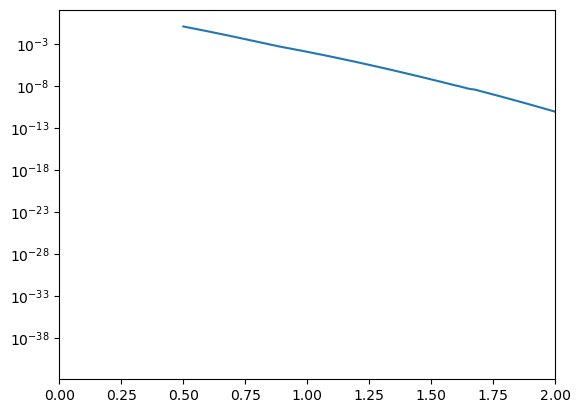

C:\Users\Luis Eduardo\AppData\Local\Temp\ipykernel_117664\607826814.py:54: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_v = quad(integrand_v, lowen, highen)
C:\Users\Luis Eduardo\AppData\Local\Temp\ipykernel_117664\607826814.py:54: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  I_v = quad(integrand_v, lowen, highen)


In [45]:
from scipy.optimize import curve_fit

cmass=[9.15,9.16,18.0,12.5,12.5]

energy=np.logspace(np.log10(0.5),np.log10(5.0),1000)
qapp=np.zeros(len(energy))
energyc2=np.zeros(len(energy))
energyc3=np.zeros(len(energy))
energyc4=np.zeros(len(energy))
energyc6=np.zeros(len(energy))
energyc7=np.zeros(len(energy))
rateres_cosine100_v=np.zeros((len(mdm),5,len(qapp)))
ratemodtot=np.zeros((len(mdm),len(energy)))
for m in range(len(mdm)):
    arq=open('./correctedspectra/set3res/COSINE100_mod_m%s_heavy_vector.txt' % ("{:.1f}".format(mdm[m])),'r')
    texto1 = arq.readlines() #salva cada linha do arquivo como uma string
    arq.close()
    for i in range(len(texto1)): #separa as colunas e elimina a ultima coluna que contem '\n'
        texto1[i] = texto1[i].split("\t")
        texto1[i] = [float(x) for x in texto1[i]] #transforma em numero os valores
    N1=len(texto1)
    for i in range(N1):
        qapp[i]=texto1[i][0]
        energyc2[i]=qc5toen_c2func(qapp[i])
        energyc3[i]=qc5toen_c3func(qapp[i])
        energyc4[i]=qc5toen_c2func(qapp[i])
        energyc6[i]=qc5toen_c4func(qapp[i])
        energyc7[i]=qc5toen_c7func(qapp[i])
        for k in range(1,6):
            rateres_cosine100_v[m][k-1][i]=texto1[i][k]
    rateres_c2func=inter.interp1d(energyc2,rateres_cosine100_v[m][0])
    rateres_c3func=inter.interp1d(energyc3,rateres_cosine100_v[m][1])
    rateres_c4func=inter.interp1d(energyc4,rateres_cosine100_v[m][2])
    rateres_c6func=inter.interp1d(energyc6,rateres_cosine100_v[m][3])
    rateres_c7func=inter.interp1d(energyc7,rateres_cosine100_v[m][4])
    for i in range(len(energy)):
        ratemodtot[m][i]=(rateres_c2func(energy[i])*cmass[0]+rateres_c3func(energy[i])*cmass[1]+rateres_c4func(energy[i])*cmass[2]
                          +rateres_c6func(energy[i])*cmass[3]+rateres_c7func(energy[i])*cmass[4])/np.sum(cmass)

plt.plot(energy,ratemodtot[11])
plt.xlim(0,2)
plt.yscale('log')
plt.show()

ratebinmod_v_SET4=np.zeros((len(mdm),5))
binen_cosine100=np.zeros(5)
for m in range(len(mdm)):
    ratefunc_v=inter.interp1d(energy,ratemodtot[m])
    def integrand_v(x):
        return (ratefunc_v(x))
    lowen=0.7
    highen=1.0
    binen_cosine100[0]=(highen+lowen)/2
    I_v = quad(integrand_v, lowen, highen)
    ratebinmod_v_SET4[m][0]=I_v[0]/0.3 #events/day/keV/kg
    lowen=lowen+0.3
    highen=lowen+1.0
    for i in range(1,5):
        binen_cosine100[i]=(highen+lowen)/2
        I_v = quad(integrand_v, lowen, highen)
        ratebinmod_v_SET4[m][i]=I_v[0]/1.0 #events/day/keV/kg
        lowen=lowen+1.0
        highen=lowen+1.0

1000000


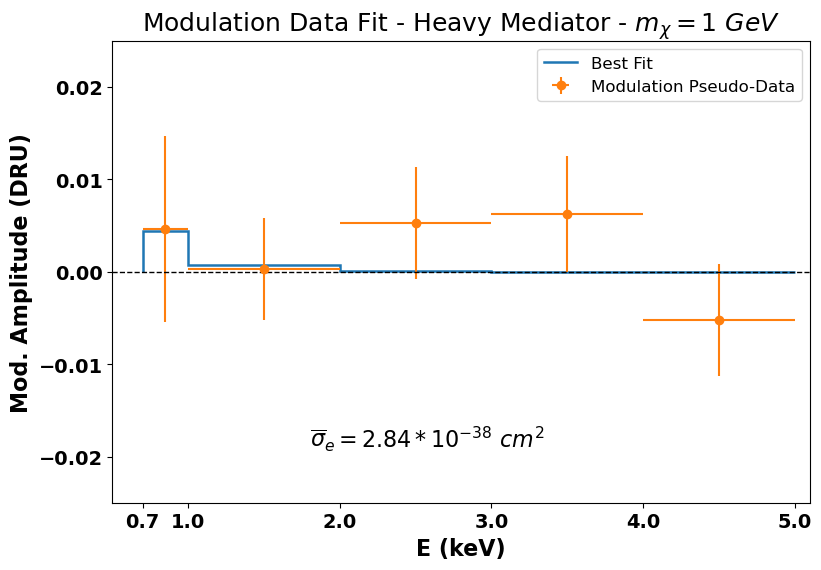

In [30]:
encos_1=[1.5,2.5,3.5,4.5]
ampcos_1=[0.01570,0.01288,0.004691,-0.007644]
errampcos_1=[0.008372,0.009182,0.009482,0.009195]

encos_075=[0.85,1.5,2.5,3.5,4.5]
binplot_075=[0.7,1.0,2.0,3.0,4.0,5.0]
ampcos_075=[0.0,0.0,0.0,0.0,0.0]
errampcos_075=[errampcos_1[0]*(2.82/6.5*1/0.3)**0.5,errampcos_1[0]*(2.82/6.5)**0.5,errampcos_1[1]*(2.82/6.5)**0.5,errampcos_1[2]*(2.82/6.5)**0.5,errampcos_1[3]*(2.82/6.5)**0.5]

arq = open('pseudodata_amp_set4.txt', 'r')
texto1 = arq.readlines()
arq.close()

for i in range(len(texto1)):
    texto1[i] = texto1[i].split("\t")
    texto1[i] = [float(x) for x in texto1[i]]

N1=len(texto1)
amp_SET4=np.zeros((N1,5))

for i in range(N1):
    for k in range(5):
        amp_SET4[i][k]=texto1[i][k]
        
mtest=22
print(mdm[mtest])
plt.figure(figsize=(9,6))
plt.stairs(2.84E-38/1E-37*ratebinmod_v_SET4[mtest],binplot_075,linewidth=1.8,label='Best Fit')
#plt.plot(energy,ratemodtot[mtest])
plt.errorbar(encos_075,amp_SET4[5],xerr=[0.15,0.5,0.5,0.5,0.5],yerr=errampcos_075,fmt='o',label='Modulation Pseudo-Data')
plt.hlines(0.0,0.5,5.1,linestyle='dashed',color='black',linewidth=1.0)
plt.xlim(0.5,5.1)
plt.ylim(-0.025,0.025)
plt.xticks([0.7,1.0,2.0,3.0,4.0,5.0],fontsize=14,fontweight='bold')
plt.yticks(fontsize=14,fontweight='bold')
plt.title('Modulation Data Fit - Heavy Mediator - $m_{\chi}=1~GeV$',fontsize=18)
plt.xlabel('E (keV)',fontsize=16,fontweight='bold')
plt.ylabel('Mod. Amplitude (DRU)',fontsize=16,fontweight='bold')
plt.legend(fontsize=12)
plt.text(1.8,-0.019,'$\overline{\sigma}_e=2.84*10^{-38}~cm^2$',fontsize=16)
plt.show()

In [29]:
upperlim_v_SET4=np.zeros((len(mdm),N1))
for i in range(N1):
    print(i)
    for m in range(len(mdm)):
        ampfunc_v=inter.interp1d(encos_075,ratebinmod_v_SET4[m])

        def function_v(x, a):
            return (a/10**(-37))*ampfunc_v(x)

        popt, pcov = curve_fit(function_v, encos_075, amp_SET4[i], sigma=errampcos_075)
        xsecalc_v=popt
        sigmaxsecalc_v=pcov**0.5
        if (sigmaxsecalc_v/xsecalc_v<-6.0 or sigmaxsecalc_v/xsecalc_v>6.08): continue
        upperlim_v_SET4[m][i]=sigmaxsecalc_v*uplimfunc(sigmaxsecalc_v/xsecalc_v)
        if (i==5): print(m,mdm[m],xsecalc_v,sigmaxsecalc_v)

0
1
2
3
4
5
0 20000 [4.30285155e-34] [[7.44028175e-34]]
1 25000 [1.44709594e-34] [[2.50218275e-34]]
2 28000 [6.9533586e-35] [[1.20227022e-34]]
3 30000 [4.53464525e-35] [[7.84047001e-35]]
4 35000 [1.88825765e-35] [[3.26472552e-35]]
5 40000 [9.61128795e-36] [[1.66169815e-35]]
6 50000 [3.55854318e-36] [[6.15181704e-36]]
7 60000 [1.68411847e-36] [[2.91104246e-36]]
8 70000 [9.27045973e-37] [[1.60218015e-36]]
9 80000 [5.67911823e-37] [[9.8133299e-37]]
10 90000 [3.7938239e-37] [[6.55440248e-37]]
11 100000 [2.71209439e-37] [[4.68464701e-37]]
12 120000 [1.60517106e-37] [[2.77147113e-37]]
13 140000 [1.08622956e-37] [[1.87458886e-37]]
14 160000 [8.04098818e-38] [[1.38698125e-37]]
15 180000 [6.34664908e-38] [[1.09413312e-37]]
16 200000 [5.25556791e-38] [[9.05535161e-38]]
17 250000 [3.7901423e-38] [[6.52171908e-38]]
18 300000 [3.12283107e-38] [[5.36742942e-38]]
19 400000 [2.5996963e-38] [[4.46089824e-38]]
20 600000 [2.4434113e-38] [[4.18563113e-38]]
21 800000 [2.59345222e-38] [[4.43791146e-38]]
22 

1626
1627
1628
1629
1630
1631
1632
1633
1634
1635
1636
1637
1638
1639
1640
1641
1642
1643
1644
1645
1646
1647
1648
1649
1650
1651
1652
1653
1654
1655
1656
1657
1658
1659
1660
1661
1662
1663
1664
1665
1666
1667
1668
1669
1670
1671
1672
1673
1674
1675
1676
1677
1678
1679
1680
1681
1682
1683
1684
1685
1686
1687
1688
1689
1690
1691
1692
1693
1694
1695
1696
1697
1698
1699
1700
1701
1702
1703
1704
1705
1706
1707
1708
1709
1710
1711
1712
1713
1714
1715
1716
1717
1718
1719
1720
1721
1722
1723
1724
1725
1726
1727
1728
1729
1730
1731
1732
1733
1734
1735
1736
1737
1738
1739
1740
1741
1742
1743
1744
1745
1746
1747
1748
1749
1750
1751
1752
1753
1754
1755
1756
1757
1758
1759
1760
1761
1762
1763
1764
1765
1766
1767
1768
1769
1770
1771
1772
1773
1774
1775
1776
1777
1778
1779
1780
1781
1782
1783
1784
1785
1786
1787
1788
1789
1790
1791
1792
1793
1794
1795
1796
1797
1798
1799
1800
1801
1802
1803
1804
1805
1806
1807
1808
1809
1810
1811
1812
1813
1814
1815
1816
1817
1818
1819
1820
1821
1822
1823
1824
1825


20000 1.0777152737923277e-33
25000 3.622934367747875e-34
28000 1.7402074158213423e-34
30000 1.1349425679517485e-34
35000 4.728176106659773e-35
40000 2.406814146041841e-35
50000 8.912701967191323e-36
60000 4.2194575763534755e-36
70000 2.3231781803930138e-36
80000 1.424535077281219e-36
90000 9.53278787975381e-37
100000 6.809001554154073e-37
120000 4.046448642132394e-37
140000 2.7401164064501565e-37
160000 2.025052105003025e-37
180000 1.5926871043783703e-37
200000 1.3218909617821923e-37
250000 9.571770990640064e-38
300000 7.898917422941939e-38
400000 6.455426988651032e-38
600000 5.955588720684418e-38
800000 6.30015433930475e-38
1000000 6.977115407271047e-38
2000000 1.0848797821266593e-37
5000000 2.383367066989871e-37
10000000 4.604808217915981e-37


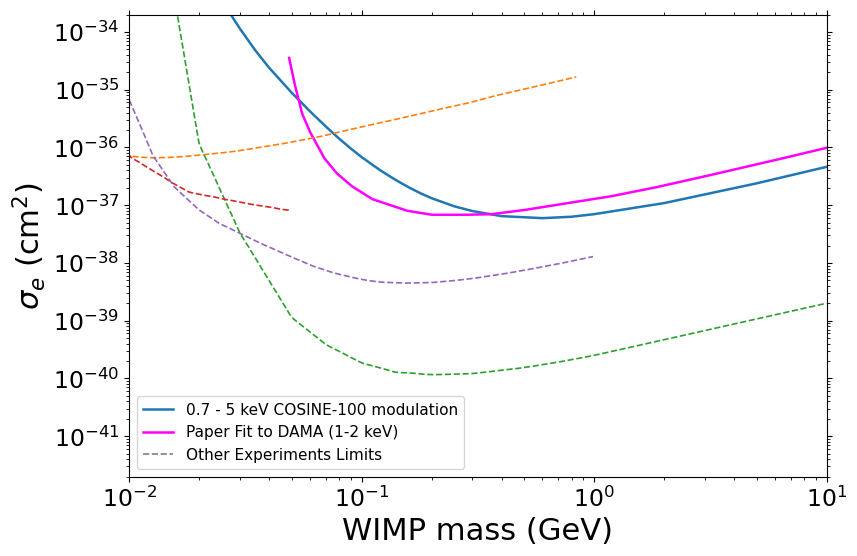

In [31]:
upperlim_v_SET4_mean=np.zeros(len(mdm))
for m in range(len(mdm)):
    remove=[]
    uplimremove=[]
    for i in range(N1):
        if (upperlim_v_SET4[m][i]==0):
            remove.append(i)
    upperlimremove=np.delete(upperlim_v_SET4[m],remove)
    upperlim_v_SET4_mean[m]=np.median(upperlimremove)
    print(mdm[m],upperlim_v_SET4_mean[m])

arq=open('DAMAfit_F1.tsv','r')
texto1 = arq.readlines() #salva cada linha do arquivo como uma string
arq.close()
for i in range(len(texto1)): #separa as colunas e elimina a ultima coluna que contem '\n'
    texto1[i] = texto1[i].split("\t")
    texto1[i] = [float(x) for x in texto1[i]] #transforma em numero os valores
N1=len(texto1)
mdmdamafit=np.zeros(N1)
sigmaedamafit=np.zeros(N1)
for i in range(N1):
    mdmdamafit[i]=texto1[i][0]
    sigmaedamafit[i]=10**texto1[i][1] #DRU
    
mdmplot=np.zeros(len(mdm))
for i in range(len(mdm)):
    mdmplot[i]=mdm[i]/10**6
    
arq=open('SENSEI_limits.tsv','r')
texto1 = arq.readlines() #salva cada linha do arquivo como uma string
arq.close()
for i in range(len(texto1)): #separa as colunas e elimina a ultima coluna que contem '\n'
    texto1[i] = texto1[i].split("\t")
    texto1[i] = [float(x) for x in texto1[i]] #transforma em numero os valores
N1=len(texto1)
mdmsensei=np.zeros(N1)
senseilim=np.zeros(N1)
for i in range(N1):
    mdmsensei[i]=texto1[i][0]/1000
    senseilim[i]=10**texto1[i][1] #DRU
    
arq=open('XENON1TS2_limits.tsv','r')
texto1 = arq.readlines() #salva cada linha do arquivo como uma string
arq.close()
for i in range(len(texto1)): #separa as colunas e elimina a ultima coluna que contem '\n'
    texto1[i] = texto1[i].split("\t")
    texto1[i] = [float(x) for x in texto1[i]] #transforma em numero os valores
N1=len(texto1)
mdmxenon1t=np.zeros(N1)
xenon1tlim=np.zeros(N1)
for i in range(N1):
    mdmxenon1t[i]=texto1[i][0]/1000
    xenon1tlim[i]=10**texto1[i][1] #DRU
    
arq=open('XENON10_limits.tsv','r')
texto1 = arq.readlines() #salva cada linha do arquivo como uma string
arq.close()
for i in range(len(texto1)): #separa as colunas e elimina a ultima coluna que contem '\n'
    texto1[i] = texto1[i].split("\t")
    texto1[i] = [float(x) for x in texto1[i]] #transforma em numero os valores
N1=len(texto1)
mdmxenon10=np.zeros(N1)
xenon10lim=np.zeros(N1)
for i in range(N1):
    mdmxenon10[i]=texto1[i][0]/1000
    xenon10lim[i]=10**texto1[i][1] #DRU
    
arq=open('PANDAX_limits.tsv','r')
texto1 = arq.readlines() #salva cada linha do arquivo como uma string
arq.close()
for i in range(len(texto1)): #separa as colunas e elimina a ultima coluna que contem '\n'
    texto1[i] = texto1[i].split("\t")
    texto1[i] = [float(x) for x in texto1[i]] #transforma em numero os valores
N1=len(texto1)
mdmpanda=np.zeros(N1)
pandalim=np.zeros(N1)
for i in range(N1):
    mdmpanda[i]=texto1[i][0]/1000
    pandalim[i]=10**texto1[i][1] #DRU

plt.figure(figsize=(9,6))
plt.plot(mdmplot,upperlim_v_SET4_mean,linewidth=1.8,label='0.7 - 5 keV COSINE-100 modulation')
plt.plot(mdmdamafit,sigmaedamafit,linewidth=1.8,label='Paper Fit to DAMA (1-2 keV)',color='magenta')
plt.plot(mdmsensei,senseilim,linewidth=1.2,linestyle='dashed')
plt.plot(mdmxenon1t,xenon1tlim,linewidth=1.2,linestyle='dashed')
plt.plot(mdmxenon10,xenon10lim,linewidth=1.2,linestyle='dashed')
plt.plot(mdmpanda,pandalim,linewidth=1.2,linestyle='dashed')
plt.plot([1,2],[1,2],linewidth=1.2,linestyle='dashed',label='Other Experiments Limits',color='gray')
plt.tick_params(axis='both',bottom=True, top=True, left=True, right=True, which='both')
plt.xscale('log')
plt.yscale('log')
plt.ylim(2E-42,2E-34)
plt.xlim(0.01,10)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.xlabel('WIMP mass (GeV)',fontsize=22)
plt.ylabel('$\sigma_e$ (cm$^2$)',fontsize=22)
plt.legend(fontsize=11, loc='lower left')
#plt.savefig('./images/WIMPelectron_cosinelimits.png',dpi=200)
plt.show()

[10000, 15000, 20000, 25000, 28000, 30000, 35000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 120000, 140000, 160000, 180000, 200000, 250000, 300000, 400000, 600000, 800000, 1000000, 2000000, 5000000, 10000000]
100000


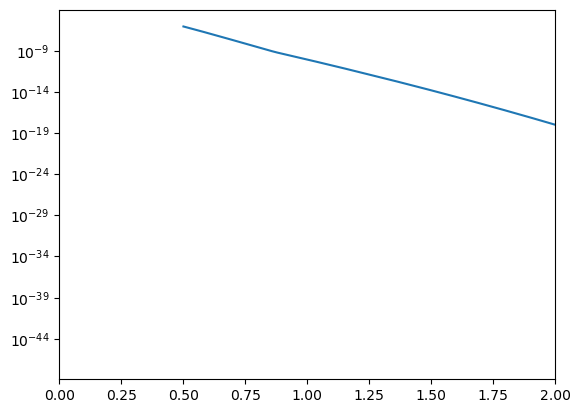

0
1
2
3
4


C:\anaconda\lib\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279


1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999


In [50]:
mdm=[10000,15000,20000,25000,28000,30000,35000,40000,50000,60000,70000,80000,90000,100000,120000,140000,160000,180000,200000,250000,300000,400000,600000,800000,1000000,2000000,5000000,10000000]
print(mdm)
cmass=[9.15,9.16,18.0,12.5,12.5]

energy=np.logspace(np.log10(0.5),np.log10(5.0),1000)
qapp=np.zeros(len(energy))
energyc2=np.zeros(len(energy))
energyc3=np.zeros(len(energy))
energyc4=np.zeros(len(energy))
energyc6=np.zeros(len(energy))
energyc7=np.zeros(len(energy))
rateres_cosine100_v=np.zeros((len(mdm),5,len(qapp)))
ratemodtot=np.zeros((len(mdm),len(energy)))
for m in range(len(mdm)):
    arq=open('./correctedspectra/set3res/COSINE100_mod_m%s_light_vector.txt' % ("{:.1f}".format(mdm[m])),'r')
    texto1 = arq.readlines() #salva cada linha do arquivo como uma string
    arq.close()
    for i in range(len(texto1)): #separa as colunas e elimina a ultima coluna que contem '\n'
        texto1[i] = texto1[i].split("\t")
        texto1[i] = [float(x) for x in texto1[i]] #transforma em numero os valores
    N1=len(texto1)
    for i in range(N1):
        qapp[i]=texto1[i][0]
        energyc2[i]=qc5toen_c2func(qapp[i])
        energyc3[i]=qc5toen_c3func(qapp[i])
        energyc4[i]=qc5toen_c2func(qapp[i])
        energyc6[i]=qc5toen_c4func(qapp[i])
        energyc7[i]=qc5toen_c7func(qapp[i])
        for k in range(1,6):
            rateres_cosine100_v[m][k-1][i]=texto1[i][k]
    rateres_c2func=inter.interp1d(energyc2,rateres_cosine100_v[m][0])
    rateres_c3func=inter.interp1d(energyc3,rateres_cosine100_v[m][1])
    rateres_c4func=inter.interp1d(energyc4,rateres_cosine100_v[m][2])
    rateres_c6func=inter.interp1d(energyc6,rateres_cosine100_v[m][3])
    rateres_c7func=inter.interp1d(energyc7,rateres_cosine100_v[m][4])
    for i in range(len(energy)):
        ratemodtot[m][i]=(rateres_c2func(energy[i])*cmass[0]+rateres_c3func(energy[i])*cmass[1]+rateres_c4func(energy[i])*cmass[2]
                          +rateres_c6func(energy[i])*cmass[3]+rateres_c7func(energy[i])*cmass[4])/np.sum(cmass)

print(mdm[13])
plt.plot(energy,ratemodtot[13])
plt.xlim(0,2)
plt.yscale('log')
plt.show()

ratebinmod_v_SET4=np.zeros((len(mdm),5))
binen_cosine100=np.zeros(5)
for m in range(len(mdm)):
    ratefunc_v=inter.interp1d(energy,ratemodtot[m])
    def integrand_v(x):
        return (ratefunc_v(x))
    lowen=0.7
    highen=1.0
    binen_cosine100[0]=(highen+lowen)/2
    I_v = quad(integrand_v, lowen, highen)
    ratebinmod_v_SET4[m][0]=I_v[0]/0.3 #events/day/keV/kg
    lowen=lowen+0.3
    highen=lowen+1.0
    for i in range(1,4):
        binen_cosine100[i]=(highen+lowen)/2
        I_v = quad(integrand_v, lowen, highen)
        ratebinmod_v_SET4[m][i]=I_v[0]/1.0 #events/day/keV/kg
        lowen=lowen+1.0
        highen=lowen+1.0
        
encos_1=[1.5,2.5,3.5,4.5]
ampcos_1=[0.01570,0.01288,0.004691,-0.007644]
errampcos_1=[0.008372,0.009182,0.009482,0.009195]

encos_075=[0.85,1.5,2.5,3.5,4.5]
binplot_075=[0.7,1.0,2.0,3.0,4.0,5.0]
ampcos_075=[0.0,0.0,0.0,0.0,0.0]
errampcos_075=[errampcos_1[0]*(2.82/6.5*1/0.3)**0.5,errampcos_1[0]*(2.82/6.5)**0.5,errampcos_1[1]*(2.82/6.5)**0.5,errampcos_1[2]*(2.82/6.5)**0.5,errampcos_1[3]*(2.82/6.5)**0.5]

arq = open('pseudodata_amp_set4.txt', 'r')
texto1 = arq.readlines()
arq.close()

for i in range(len(texto1)):
    texto1[i] = texto1[i].split("\t")
    texto1[i] = [float(x) for x in texto1[i]]

N1=len(texto1)
amp_SET4=np.zeros((N1,5))

for i in range(N1):
    for k in range(5):
        amp_SET4[i][k]=texto1[i][k]
        
#mtest=0
#plt.scatter(encos_075,ratebinmod_v_SET4[mtest],linewidth=1.8,color='blue',label='Vector')
#plt.plot(energy,ratemodtot[mtest])
#plt.errorbar(encos_075,amp_SET4[1],xerr=[0.15,0.5,0.5,0.5,0.5],yerr=errampcos_075)
#plt.xlim(0.7,5)
#plt.ylim(-0.05,0.05)
#plt.show()

upperlim_v_SET4=np.zeros((len(mdm),N1))
for i in range(N1):
    print(i)
    for m in range(len(mdm)):
        ampfunc_v=inter.interp1d(encos_075,ratebinmod_v_SET4[m])

        def function_v(x, a):
            return (a/10**(-37))*ampfunc_v(x)

        popt, pcov = curve_fit(function_v, encos_075, amp_SET4[i], sigma=errampcos_075)
        xsecalc_v=popt
        sigmaxsecalc_v=pcov**0.5
        if (sigmaxsecalc_v/xsecalc_v<-6.0 or sigmaxsecalc_v/xsecalc_v>6.08): continue
        upperlim_v_SET4[m][i]=sigmaxsecalc_v*uplimfunc(sigmaxsecalc_v/xsecalc_v)

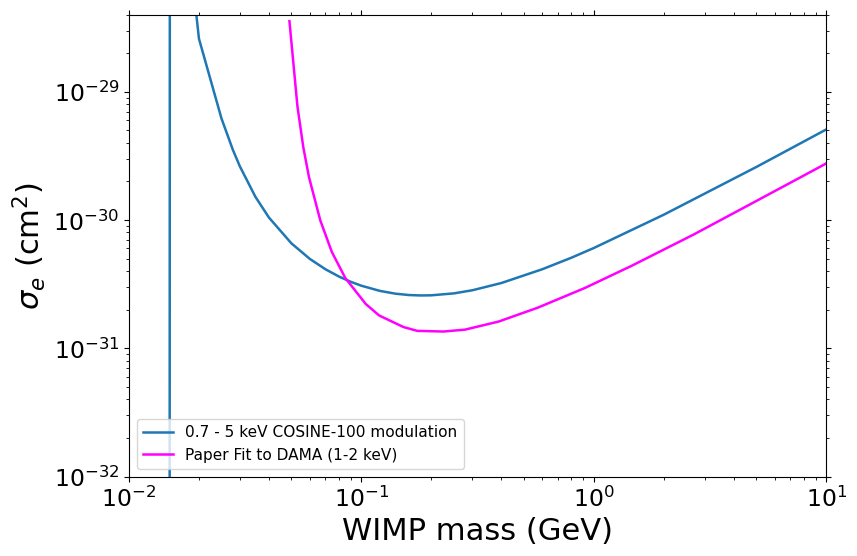

In [54]:
upperlim_v_SET4_mean=np.zeros(len(mdm))
for m in range(len(mdm)):
    remove=[]
    uplimremove=[]
    for i in range(N1):
        if (upperlim_v_SET4[m][i]==0):
            remove.append(i)
    upperlimremove=np.delete(upperlim_v_SET4[m],remove)
    upperlim_v_SET4_mean[m]=np.median(upperlimremove)

arq=open('DAMAfit_F1_lightDP.tsv','r')
texto1 = arq.readlines() #salva cada linha do arquivo como uma string
arq.close()
for i in range(len(texto1)): #separa as colunas e elimina a ultima coluna que contem '\n'
    texto1[i] = texto1[i].split("\t")
    texto1[i] = [float(x) for x in texto1[i]] #transforma em numero os valores
N1=len(texto1)
mdmdamafit=np.zeros(N1)
sigmaedamafit=np.zeros(N1)
for i in range(N1):
    mdmdamafit[i]=texto1[i][0]
    sigmaedamafit[i]=10**texto1[i][1] #DRU
    
mdmplot=np.zeros(len(mdm))
for i in range(len(mdm)):
    mdmplot[i]=mdm[i]/10**6
    
arq=open('SENSEI_limits_lightDP.tsv','r')
texto1 = arq.readlines() #salva cada linha do arquivo como uma string
arq.close()
for i in range(len(texto1)): #separa as colunas e elimina a ultima coluna que contem '\n'
    texto1[i] = texto1[i].split("\t")
    texto1[i] = [float(x) for x in texto1[i]] #transforma em numero os valores
N1=len(texto1)
mdmsensei=np.zeros(N1)
senseilim=np.zeros(N1)
for i in range(N1):
    mdmsensei[i]=texto1[i][0]/1000
    senseilim[i]=10**texto1[i][1] #DRU

plt.figure(figsize=(9,6))
plt.plot(mdmplot,upperlim_v_SET4_mean,linewidth=1.8,label='0.7 - 5 keV COSINE-100 modulation')
plt.plot(mdmdamafit,sigmaedamafit,linewidth=1.8,label='Paper Fit to DAMA (1-2 keV)',color='magenta')
plt.plot(mdmsensei,senseilim,linewidth=1.2,linestyle='dashed')
plt.tick_params(axis='both',bottom=True, top=True, left=True, right=True, which='both')
plt.xscale('log')
plt.yscale('log')
plt.ylim(1E-32,4E-29)
plt.xlim(0.01,10)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.xlabel('WIMP mass (GeV)',fontsize=22)
plt.ylabel('$\sigma_e$ (cm$^2$)',fontsize=22)
plt.legend(fontsize=11, loc='lower left')
#plt.savefig('./images/WIMPelectron_cosinelimits.png',dpi=200)
plt.show()

# Total Spectra

In [175]:
arq = open('./effc2_SET3.tsv', 'r')
texto1 = arq.readlines()
arq.close()

for i in range(len(texto1)):
    texto1[i] = texto1[i].split("\t")
    texto1[i] = [float(x) for x in texto1[i]]

N1=len(texto1)
NPEc2=np.zeros(N1)
effc2=np.zeros(N1)
for i in range(N1):
    NPEc2[i]=texto1[i][0]
    effc2[i]=texto1[i][1]
NPEtoqc5_c2=NPEc2*620.697571
effc2func=inter.interp1d(NPEtoqc5_c2,effc2)

arq = open('./effc3_SET3.tsv', 'r')
texto1 = arq.readlines()
arq.close()

for i in range(len(texto1)):
    texto1[i] = texto1[i].split("\t")
    texto1[i] = [float(x) for x in texto1[i]]

N1=len(texto1)
NPEc3=np.zeros(N1)
effc3=np.zeros(N1)
for i in range(N1):
    NPEc3[i]=texto1[i][0]
    effc3[i]=texto1[i][1]
NPEtoqc5_c3=NPEc3*639.862549
effc3func=inter.interp1d(NPEtoqc5_c3,effc3)
print(effc3func(entoqc5_c3func(1.125)))

arq = open('./effc4_SET3.tsv', 'r')
texto1 = arq.readlines()
arq.close()

for i in range(len(texto1)):
    texto1[i] = texto1[i].split("\t")
    texto1[i] = [float(x) for x in texto1[i]]

N1=len(texto1)
NPEc4=np.zeros(N1)
effc4=np.zeros(N1)
for i in range(N1):
    NPEc4[i]=texto1[i][0]
    effc4[i]=texto1[i][1]
NPEtoqc5_c4=NPEc4*587.438110
effc4func=inter.interp1d(NPEtoqc5_c4,effc4)

arq = open('./effc6_SET3.tsv', 'r')
texto1 = arq.readlines()
arq.close()

for i in range(len(texto1)):
    texto1[i] = texto1[i].split("\t")
    texto1[i] = [float(x) for x in texto1[i]]

N1=len(texto1)
NPEc6=np.zeros(N1)
effc6=np.zeros(N1)
for i in range(N1):
    NPEc6[i]=texto1[i][0]
    effc6[i]=texto1[i][1]
NPEtoqc5_c6=NPEc6*565.981445
effc6func=inter.interp1d(NPEtoqc5_c6,effc6)

arq = open('./effc7_SET3.tsv', 'r')
texto1 = arq.readlines()
arq.close()

for i in range(len(texto1)):
    texto1[i] = texto1[i].split("\t")
    texto1[i] = [float(x) for x in texto1[i]]

N1=len(texto1)
NPEc7=np.zeros(N1)
effc7=np.zeros(N1)
for i in range(N1):
    NPEc7[i]=texto1[i][0]
    effc7[i]=texto1[i][1]
NPEtoqc5_c7=NPEc7*590.684814
effc7func=inter.interp1d(NPEtoqc5_c7,effc7)


mdm=[30000,35000,40000,50000,60000,70000,80000,90000,100000,120000,140000,160000,180000,200000,250000,300000,400000,600000,800000,1000000,2000000,5000000,10000000]
print(mdm)
cmass=[9.15,9.16,18.0,12.5,12.5]

energy=np.linspace(0.2,5.5,1500)
qapp=np.zeros(1500)
energyc2=np.zeros(1500)
energyc3=np.zeros(1500)
energyc4=np.zeros(1500)
energyc6=np.zeros(1500)
energyc7=np.zeros(1500)
rateres_cosine100_v=np.zeros((len(mdm),5,len(qapp)))
ratemodtot=np.zeros((len(mdm),len(energy)))
for m in range(len(mdm)):
    arq=open('./correctedspectra/COSINE100_med_m%s_heavy_vector_SET3.txt' % ("{:.1f}".format(mdm[m])),'r')
    texto1 = arq.readlines() #salva cada linha do arquivo como uma string
    arq.close()
    for i in range(len(texto1)): #separa as colunas e elimina a ultima coluna que contem '\n'
        texto1[i] = texto1[i].split("\t")
        texto1[i] = [float(x) for x in texto1[i]] #transforma em numero os valores
    N1=len(texto1)
    for i in range(N1):
        qapp[i]=texto1[i][0]
        if (qc5toen_c2func(qapp[i])<0.7 or qc5toen_c3func(qapp[i])<0.7 or qc5toen_c4func(qapp[i])<0.7 or qc5toen_c6func(qapp[i])<0.7 or qc5toen_c7func(qapp[i])<0.7): continue
        energyc2[i]=qc5toen_c2func(qapp[i])
        energyc3[i]=qc5toen_c3func(qapp[i])
        energyc4[i]=qc5toen_c2func(qapp[i])
        energyc6[i]=qc5toen_c4func(qapp[i])
        energyc7[i]=qc5toen_c7func(qapp[i])
        rateres_cosine100_v[m][0][i]=texto1[i][1]*effc2func(qapp[i])
        rateres_cosine100_v[m][1][i]=texto1[i][2]*effc3func(qapp[i])
        rateres_cosine100_v[m][2][i]=texto1[i][3]*effc4func(qapp[i])
        rateres_cosine100_v[m][3][i]=texto1[i][4]*effc6func(qapp[i])
        rateres_cosine100_v[m][4][i]=texto1[i][5]*effc7func(qapp[i])
    rateres_c2func=inter.interp1d(energyc2,rateres_cosine100_v[m][0])
    rateres_c3func=inter.interp1d(energyc3,rateres_cosine100_v[m][1])
    rateres_c4func=inter.interp1d(energyc4,rateres_cosine100_v[m][2])
    rateres_c6func=inter.interp1d(energyc6,rateres_cosine100_v[m][3])
    rateres_c7func=inter.interp1d(energyc7,rateres_cosine100_v[m][4])
    for i in range(len(energy)):
        if (qc5toen_c2func(qapp[i])<0.7 or qc5toen_c3func(qapp[i])<0.7 or qc5toen_c4func(qapp[i])<0.7 or qc5toen_c6func(qapp[i])<0.7 or qc5toen_c7func(qapp[i])<0.7): continue
        ratemodtot[m][i]=(rateres_c2func(energy[i])*cmass[0]+rateres_c3func(energy[i])*cmass[1]+rateres_c4func(energy[i])*cmass[2]
                          +rateres_c6func(energy[i])*cmass[3]+rateres_c7func(energy[i])*cmass[4])/np.sum(cmass)

ratebinmed_SET3_v=np.zeros((len(mdm),19))
binen_cosine100=np.zeros(19)
for m in range(len(mdm)):
    ratefunc_v=inter.interp1d(energy,ratemodtot[m])
    def integrand_v(x):
        return (ratefunc_v(x))
    lowen=0.7
    highen=1.0
    binen_cosine100[0]=(highen+lowen)/2
    I_v = quad(integrand_v, lowen, highen)
    ratebinmed_SET3_v[m][0]=I_v[0]/0.3 #events/day/keV/kg
    lowen=lowen+0.3
    highen=lowen+0.25
    for i in range(1,19):
        binen_cosine100[i]=(highen+lowen)/2
        I_v = quad(integrand_v, lowen, highen)
        ratebinmed_SET3_v[m][i]=I_v[0]/0.25 #events/day/keV/kg
        lowen=lowen+0.25
        highen=lowen+0.25

0.5705830585620981
[30000, 35000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 120000, 140000, 160000, 180000, 200000, 250000, 300000, 400000, 600000, 800000, 1000000, 2000000, 5000000, 10000000]


C:\Users\Luis Eduardo\AppData\Local\Temp\ipykernel_59116\80130223.py:141: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  I_v = quad(integrand_v, lowen, highen)
C:\Users\Luis Eduardo\AppData\Local\Temp\ipykernel_59116\80130223.py:141: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_v = quad(integrand_v, lowen, highen)
C:\Users\Luis Eduardo\AppData\Local\Temp\ipykernel_59116\80130223.py:147: IntegrationWarning: The occurrence of roundoff error is detected, which p

[20000, 25000, 30000, 35000, 40000, 50000, 60000, 70000, 80000, 100000, 120000, 140000, 160000, 180000, 200000, 250000, 300000, 400000, 600000, 800000, 1000000, 2000000, 5000000, 10000000]
100000 1000000 10000000


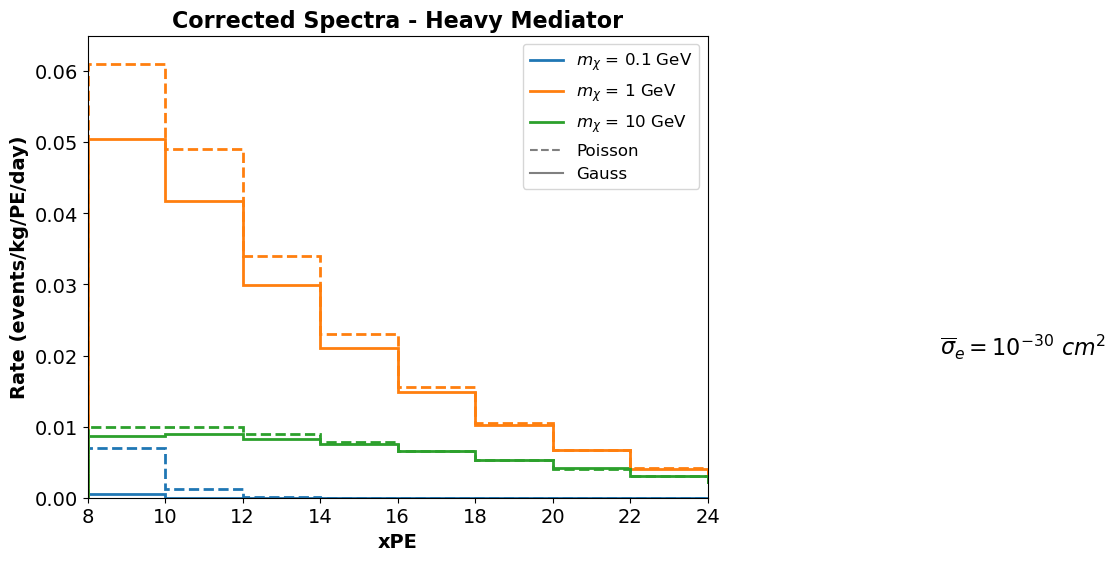

In [21]:
cmass=[9.15,9.16,18.0,12.5,12.5]
mdm=[20000,25000,30000,35000,40000,50000,60000,70000,80000,100000,120000,140000,160000,180000,200000,250000,300000,400000,600000,800000,1000000,2000000,5000000,10000000]
print(mdm)

ratec2_gauss=np.zeros((len(mdm),34))
ratec3_gauss=np.zeros((len(mdm),34))
ratec4_gauss=np.zeros((len(mdm),34))
ratec6_gauss=np.zeros((len(mdm),34))
ratec7_gauss=np.zeros((len(mdm),34))
rate_gauss=np.zeros((len(mdm),34))
for m in range(len(mdm)):
    arq=open('./correctedspectra/set3res/gauss/energy/COSINE100_med_m%d_heavy_vector_8xpe.txt' % mdm[m],'r')
    texto1 = arq.readlines() #salva cada linha do arquivo como uma string
    arq.close()
    for i in range(len(texto1)): #separa as colunas e elimina a ultima coluna que contem '\n'
        texto1[i] = texto1[i].split("\t")
        texto1[i] = [float(x) for x in texto1[i]] #transforma em numero os valores
    N1=len(texto1)
    xpeplot=np.zeros(N1+1)
    for i in range(N1):
        xpeplot[i]=texto1[i][0]-1.0
        ratec2_gauss[m][i]=texto1[i][1]
        ratec3_gauss[m][i]=texto1[i][2]
        ratec4_gauss[m][i]=texto1[i][3]
        ratec6_gauss[m][i]=texto1[i][4]
        ratec7_gauss[m][i]=texto1[i][5]
        rate_gauss[m][i]=(ratec2_gauss[m][i]*cmass[0]+ratec3_gauss[m][i]*cmass[1]+ratec4_gauss[m][i]*cmass[2]+ratec6_gauss[m][i]*cmass[3]+ratec7_gauss[m][i]*cmass[4])/np.sum(cmass)
    xpeplot[N1]=xpeplot[N1-1]+1.0
    
ratec2_poisson=np.zeros((len(mdm),34))
ratec3_poisson=np.zeros((len(mdm),34))
ratec4_poisson=np.zeros((len(mdm),34))
ratec6_poisson=np.zeros((len(mdm),34))
ratec7_poisson=np.zeros((len(mdm),34))
rate_poisson=np.zeros((len(mdm),34))
for m in range(len(mdm)):
    arq=open('./correctedspectra/set3res/scaledpoisson/energy/COSINE100_med_m%d_heavy_vector_8xpe.txt' % mdm[m],'r')
    texto1 = arq.readlines() #salva cada linha do arquivo como uma string
    arq.close()
    for i in range(len(texto1)): #separa as colunas e elimina a ultima coluna que contem '\n'
        texto1[i] = texto1[i].split("\t")
        texto1[i] = [float(x) for x in texto1[i]] #transforma em numero os valores
    N1=len(texto1)
    for i in range(N1):
        ratec2_poisson[m][i]=texto1[i][1]
        ratec3_poisson[m][i]=texto1[i][2]
        ratec4_poisson[m][i]=texto1[i][3]
        ratec6_poisson[m][i]=texto1[i][4]
        ratec7_poisson[m][i]=texto1[i][5]
        rate_poisson[m][i]=(ratec2_poisson[m][i]*cmass[0]+ratec3_poisson[m][i]*cmass[1]+ratec4_poisson[m][i]*cmass[2]+ratec6_poisson[m][i]*cmass[3]+ratec7_poisson[m][i]*cmass[4])/np.sum(cmass)
        
print(mdm[9],mdm[20],mdm[23])
plt.figure(figsize=(8,6))
plt.title('Corrected Spectra - Heavy Mediator',fontsize=16,fontweight='bold')
plt.stairs((10**(-37)/10**(-37))*rate_gauss[9],xpeplot,linewidth=2.0,color='#1f77b4',label='$m_\chi$ = 0.1 GeV')
plt.stairs((10**(-37)/10**(-37))*rate_gauss[20],xpeplot,linewidth=2.0,color='#ff7f0e',label='$m_\chi$ = 1 GeV')
plt.stairs((10**(-37)/10**(-37))*rate_gauss[23],xpeplot,linewidth=2.0,color='#2ca02c',label='$m_\chi$ = 10 GeV')
plt.stairs((10**(-37)/10**(-37))*rate_poisson[9],xpeplot,linewidth=2.0,color='#1f77b4',linestyle='dashed')
plt.stairs((10**(-37)/10**(-37))*rate_poisson[20],xpeplot,linewidth=2.0,color='#ff7f0e',linestyle='dashed')
plt.stairs((10**(-37)/10**(-37))*rate_poisson[23],xpeplot,linewidth=2.0,color='#2ca02c',linestyle='dashed')
plt.plot(1,2,label='Poisson',color='grey',linestyle='dashed')
plt.plot(1,2,label='Gauss',color='grey')
plt.xlabel('xPE',fontsize=14,fontweight='bold')
plt.ylabel('Rate (events/kg/PE/day)',fontsize=14,fontweight='bold')
plt.text(30,2E-2,'$\overline{\sigma}_e=10^{-30}~cm^2$',fontsize=16)
plt.xlim(8,24)
plt.ylim(0,0.065)
#plt.yscale('log')
plt.xticks([8,10,12,14,16,18,20,22,24],fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=12)
#plt.savefig('./images/')